In [1]:
import matplotlib.pyplot as plt #visualization create data plot or graps
%matplotlib inline

import sep #source extraction and photometry 
import math #math functions
import keras #neural network library written
from keras.utils import np_utils #transforming data into a format that can be used by neural network

import numpy as np #support for large mulidimensional arrays and matrices 
from astropy.io import fits #reading and writing fits images
from astropy.visualization import ZScaleInterval #scaling pixel values in astronomical images
from astropy import wcs #containing classed for handling WCS transformation
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord #class for representing celestial coordinates

import random #generates random numbers and performing random sampling 
import aplpy #creating and visualizing astronomical images
from astroquery.sdss import SDSS #querying sdss databases

from sklearn.metrics import accuracy_score #computing the accuracy score of a classification model 
# by comparing the predicted labels to the true labels

np.random.seed(123)  # for reproducibility

2023-03-13 13:44:07.210745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Downloading data

In [3]:
#contains the data and corresponding labels for a set of simulated galaxy images 
data_sim = np.load('galaxy_images.npy')
labels_sim = np.load('galaxy_labels.npy')

NameError: name 'np' is not defined

In [ ]:
##this code display 55 samples of simulated data 
#the lop iterates over first five images in the data
#SAMPLES OF SIMULATED DATA
for i in range(5):
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)    
    
    interval = ZScaleInterval()
    vmin, vmax = interval.get_limits(data_sim)
    fig_1 = ax.imshow(data_sim[i,:,:,0], vmin=vmin, vmax=vmax, origin='lower',cmap='gray')
    fig_2 = ax2.imshow(data_sim[i,:,:,1], vmin=vmin, vmax=vmax, origin='lower',cmap='gray')
    
    f.colorbar(fig_1, ax=ax)
    f.colorbar(fig_2, ax=ax2)

Spliting data to train set and test set

In [5]:
data_sim_train = data_sim[0:800, :,:,:] #assigned the first 8000 samples of the daya sim array
data_sim_test = data_sim[800:1000,:,:,:] #being assigned samples 800 and 999 of the data_sim array
labels_sim_train = labels_sim[0:800] #assigned the first 800 lables of the labels_sim array
labels_sim_test = labels_sim[800:1000] #assigned labels 800 and 999 labels_sim array

In [5]:
#we need to transform labels to format (N,2) - now is only (N,1)

In [6]:
#converts the labels a class vectors integers to binary class matrix. in other words it converts of labels 
#into one-hot encoding matrix. 
labels_train_2 = np_utils.to_categorical(labels_sim_train)
labels_test_2 = np_utils.to_categorical(labels_sim_test)

CNN - one input

In [1]:
#sequential - allows you to build model layer by layer 
#dense - a layer type that represents a fully connected layer in a neural network 
#Conv2D - applies a set of filters to an inout image to extracr features 
#Flatten - flattens the output of the previous later to a 1D vector. often used as a transition between convolutional and fully connected layer
#Conv3D - processing 3D volumes of data 
#Maxpooling2D - reduces the spatial dimensions of the inout by taking the max value over a small window
#Dropout - regularization technique that randomly drops out some of the neurons in a layer during training to prevent overfitting
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, Conv3D, MaxPooling2D, Dropout

2023-05-09 21:35:09.342575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#create model
model1 = Sequential()
#add model layers
model1.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(21,21,2)))
model1.add(Conv2D(5, kernel_size=3, activation='relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Dropout(0.25))
model1.add(Conv2D(3, kernel_size=3, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(2, activation='softmax'))

2023-05-09 21:35:25.936858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 19, 10)        190       
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 5)         455       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 5)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 5, 5)           0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 3)           138       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 3)          0         
 2D)                                                    

In [20]:
#traning by specifing the optimizer, loss functions and metrics. 
#the optimizer is adam which is an algorithm for stochastic gradient descent. 
#the loss function is binary cross-entropy which is commonly used for binary classification problems
#the metrics to evaluate the model during training and testing are accuracy 
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history=model1.fit(data_sim_train, labels_train_2, validation_data=(data_sim_test, labels_test_2), epochs=30)

ValueError: Error when checking target: expected dense_12 to have shape (2,) but got array with shape (1,)

In [12]:
labels_test_predict = model1.predict(data_sim_test)

In [13]:
#labels_predict = np.round(labels_predict)

In [14]:
#labels_predict = labels_predict.astype(int)

In [15]:
labels_predict2 = np.argmax(labels_test_predict, axis=-1)

In [16]:
labels_test_2 = np.argmax(labels_test_2, axis=-1)

In [17]:
accuracy_score(labels_test_2, labels_predict2)

1.0

In [27]:
model1.save("CNNsingle.h5")

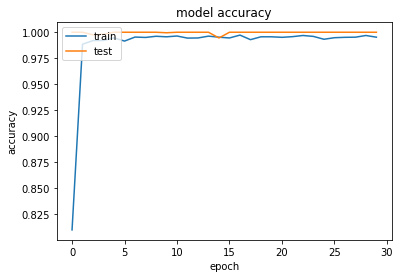

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_seq.png')
plt.show()

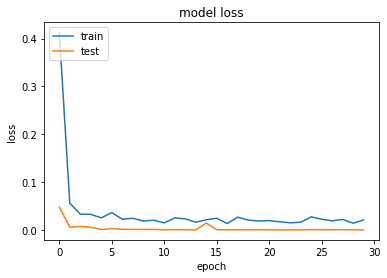

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_function_seq.png')
plt.show()

PREDICTION ON REAL DATA

In [20]:
data_galaxy = np.load('datasets/galaxy_ic4559_images_scaled.npy')
labels_galaxy = np.load('datasets/galaxy_ic4559_labels_scaled.npy')

In [21]:
labels_galaxy_pred = model1.predict(data_galaxy)

In [64]:
#galaxy_labels = np.round(galaxy_labels)
#galaxy_labels = galaxy_labels.astype(int)

In [22]:
labels_pred_model1 = np.argmax(labels_galaxy_pred, axis=-1)

In [26]:
labels_pred_model1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
accuracy_score(labels_galaxy, labels_pred_model1)

0.9921875

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(labels_galaxy, labels_pred_model1)

array([[315,   5],
       [  0, 320]])

In [18]:
def show_field(field1,field2):

    combined_data = np.array([field1,field2])
    #Get the min and max of all your data
    _min, _max = np.amin(combined_data), np.amax(combined_data)

    return _min, _max
        

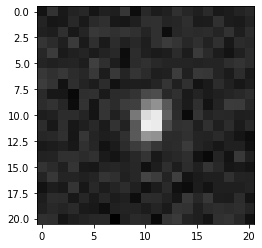

In [59]:
scale = show_field(data_sim[0,:,:,0],data_sim[0,:,:,1])
plt.imshow(data_sim[1,:,:,1], vmin=scale[0], vmax=scale[1], cmap='gray')
plt.autoscale(False)
plt.imsave('data_sim_nontr1.png', data_sim[1,:,:,1], vmin=scale[0], vmax=scale[1],cmap='gray')
